In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install osmnx
!pip install osmnx geopandas pandas matplotlib


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


In [2]:
import osmnx as ox
# Download the road network of Porto City
city_name = "Porto, Portugal"
road_network = ox.graph_from_place(city_name, network_type='drive')
ox.save_graphml(road_network, "porto_road_network.graphml")

print("Data preparation completed!")

Data preparation completed!


In [ ]:
import zipfile
import pandas as pd

# Step 1: Unzip the file
zip_file_path = '/content/drive/MyDrive/traincsv_proj2.zip'  # Path to the zip file
unzip_dir = '/content/drive/MyDrive/traincsv_proj2/'  # Directory to unzip the contents

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print(f"Unzipped files: {zip_ref.namelist()}")  # List the files inside the zip

# Step 2: Read the 'train.csv' file
csv_file_path = f"{unzip_dir}train.csv"

# Read the CSV file into a pandas DataFrame
train_data = pd.read_csv(csv_file_path)

# Step 3: Display the first few rows of the DataFrame
train_data.head(10)


Unzipped files: ['train.csv']


,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."
5,1372636965620000231,C,NaN,NaN,20000231,1372636965,A,False,"[[-8.615502,41.140674],[-8.614854,41.140926],[..."
6,1372637210620000456,C,NaN,NaN,20000456,1372637210,A,False,"[[-8.57952,41.145948],[-8.580942,41.145039],[-..."
7,1372637299620000011,C,NaN,NaN,20000011,1372637299,A,False,"[[-8.617563,41.146182],[-8.617527,41.145849],[..."
8,1372637274620000403,C,NaN,NaN,20000403,1372637274,A,False,"[[-8.611794,41.140557],[-8.611785,41.140575],[..."
9,1372637905620000320,C,NaN,NaN,20000320,1372637905,A,False,"[[-8.615907,41.140557],[-8.614449,41.141088],[..."


In [ ]:
import pandas as pd
import ast

def remove_empty_rows(data):
    # Function to check if the coordinates are valid
    def is_valid_coordinates(polyline):
        try:
            coordinates = ast.literal_eval(polyline)
            return bool(coordinates)  # Return True if the coordinates list is not empty
        except (ValueError, SyntaxError):
            return False  # Return False if the string cannot be parsed or if the coordinates are empty

    # Filter the rows where the POLYLINE contains valid coordinates
    valid_data = data[data['POLYLINE'].apply(is_valid_coordinates)]

    return valid_data

train_1500 = train_data.head(1500)

train_1497 = remove_empty_rows(train_1500)
row_count = train_1497.shape[0]
print(row_count)
# Save the cleaned data
train_1497.to_csv('train_1497.csv', index=False)

# Verify the cleaned data
train_1497.head(10)


1497


,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."
5,1372636965620000231,C,NaN,NaN,20000231,1372636965,A,False,"[[-8.615502,41.140674],[-8.614854,41.140926],[..."
6,1372637210620000456,C,NaN,NaN,20000456,1372637210,A,False,"[[-8.57952,41.145948],[-8.580942,41.145039],[-..."
7,1372637299620000011,C,NaN,NaN,20000011,1372637299,A,False,"[[-8.617563,41.146182],[-8.617527,41.145849],[..."
8,1372637274620000403,C,NaN,NaN,20000403,1372637274,A,False,"[[-8.611794,41.140557],[-8.611785,41.140575],[..."
9,1372637905620000320,C,NaN,NaN,20000320,1372637905,A,False,"[[-8.615907,41.140557],[-8.614449,41.141088],[..."


In [ ]:
train_1497.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1497 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRIP_ID       1497 non-null   int64  
 1   CALL_TYPE     1497 non-null   object 
 2   ORIGIN_CALL   406 non-null    float64
 3   ORIGIN_STAND  689 non-null    float64
 4   TAXI_ID       1497 non-null   int64  
 5   TIMESTAMP     1497 non-null   int64  
 6   DAY_TYPE      1497 non-null   object 
 7   MISSING_DATA  1497 non-null   bool   
 8   POLYLINE      1497 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 106.7+ KB


In [ ]:
train_1497.describe()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP
count,1.497000e+03,406.000000,689.000000,1.497000e+03,1.497000e+03
mean,1.372661e+18,23376.431034,29.927431,2.000035e+07,1.372661e+09
std,1.006284e+13,20091.894088,18.102678,2.056486e+02,1.006284e+04
min,1.372637e+18,2001.000000,1.000000,2.000000e+07,1.372637e+09
25%,1.372655e+18,5258.500000,15.000000,2.000018e+07,1.372655e+09
50%,1.372665e+18,16217.000000,25.000000,2.000036e+07,1.372665e+09
75%,1.372669e+18,40226.750000,49.000000,2.000052e+07,1.372669e+09
max,1.372675e+18,63882.000000,63.000000,2.000090e+07,1.372675e+09


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1497 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TRIP_ID       1497 non-null   int64  
 1   CALL_TYPE     1497 non-null   object 
 2   ORIGIN_CALL   406 non-null    float64
 3   ORIGIN_STAND  689 non-null    float64
 4   TAXI_ID       1497 non-null   int64  
 5   TIMESTAMP     1497 non-null   int64  
 6   DAY_TYPE      1497 non-null   object 
 7   MISSING_DATA  1497 non-null   bool   
 8   POLYLINE      1497 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 106.7+ KB
None


Summary Statistics for Numerical Columns:
            TRIP_ID   ORIGIN_CALL  ORIGIN_STAND       TAXI_ID     TIMESTAMP
count  1.497000e+03    406.000000    689.000000  1.497000e+03  1.497000e+03
mean   1.372661e+18  23376.431034     29.927431  2.000035e+07  1.372661e+09
std    1.006284e+13  20091.894088     18.102678  2.056486e+02 

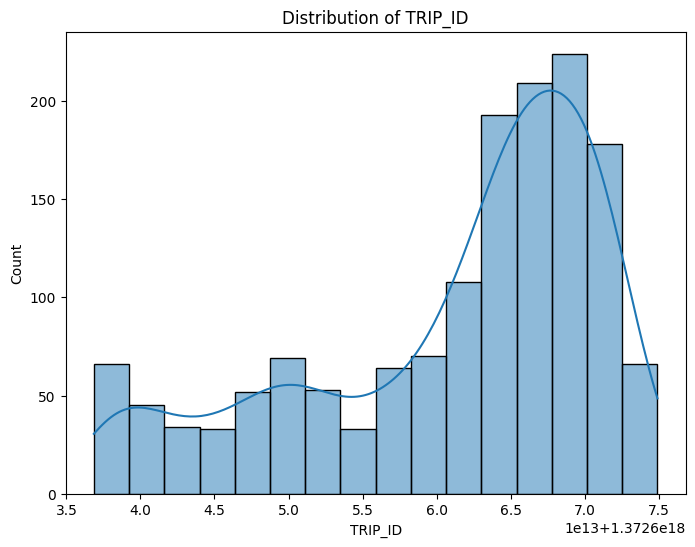

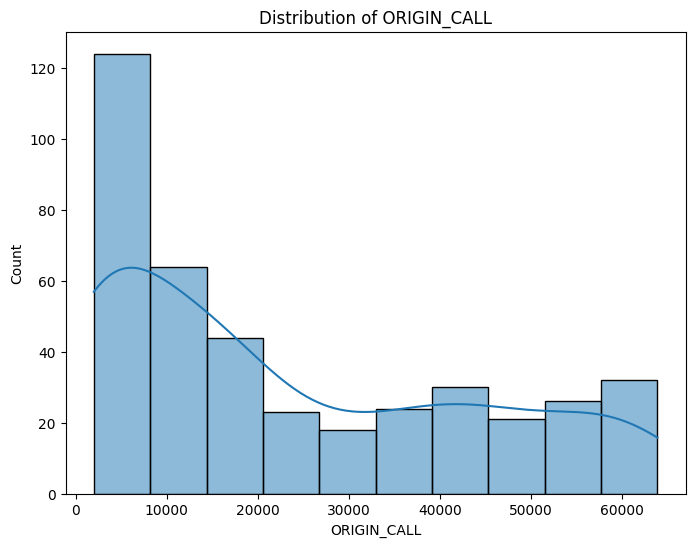

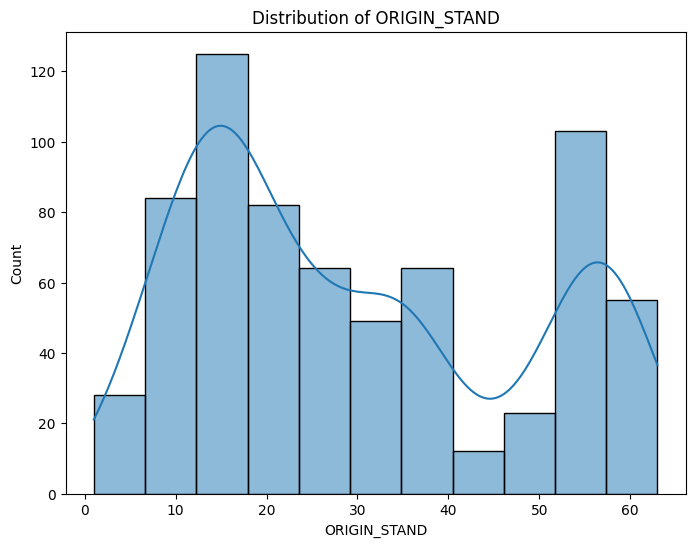

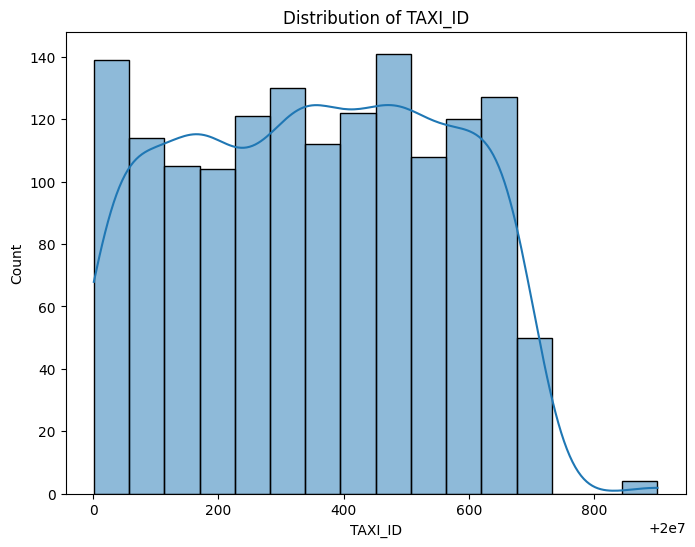

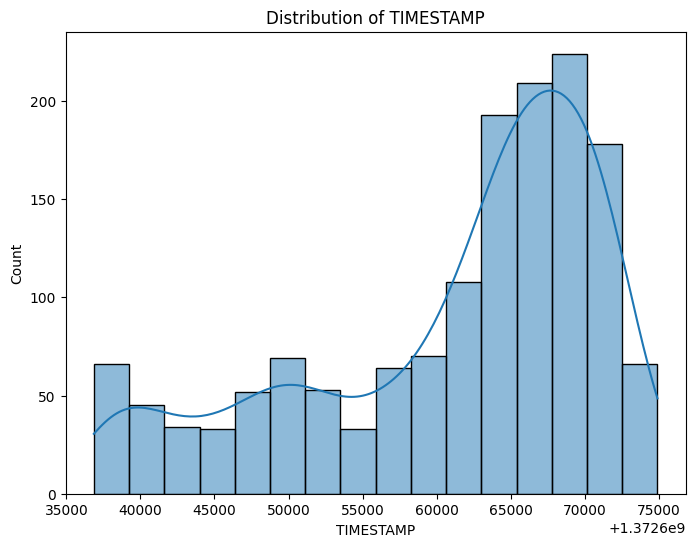

Correlation Heatmap of Numerical Columns:


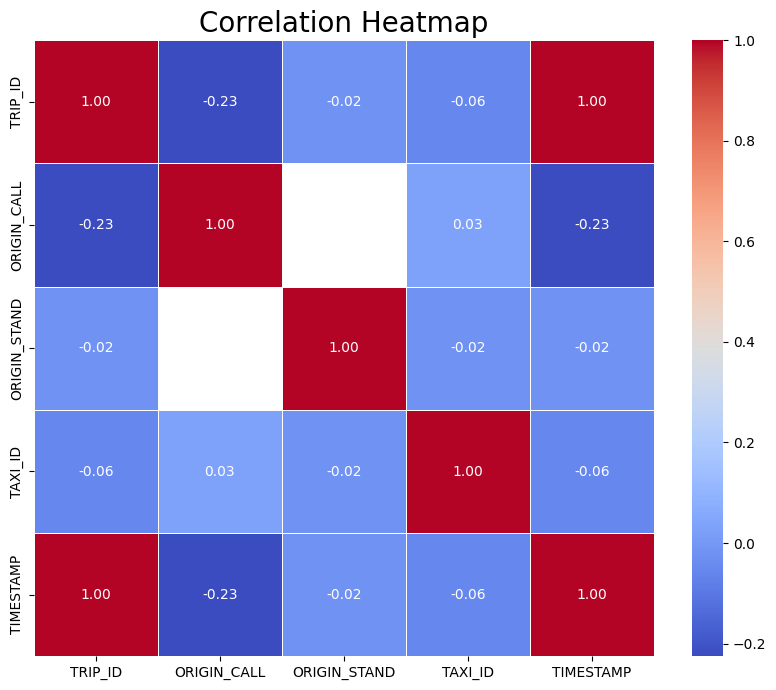

Pairwise Relationships (Pairplot):


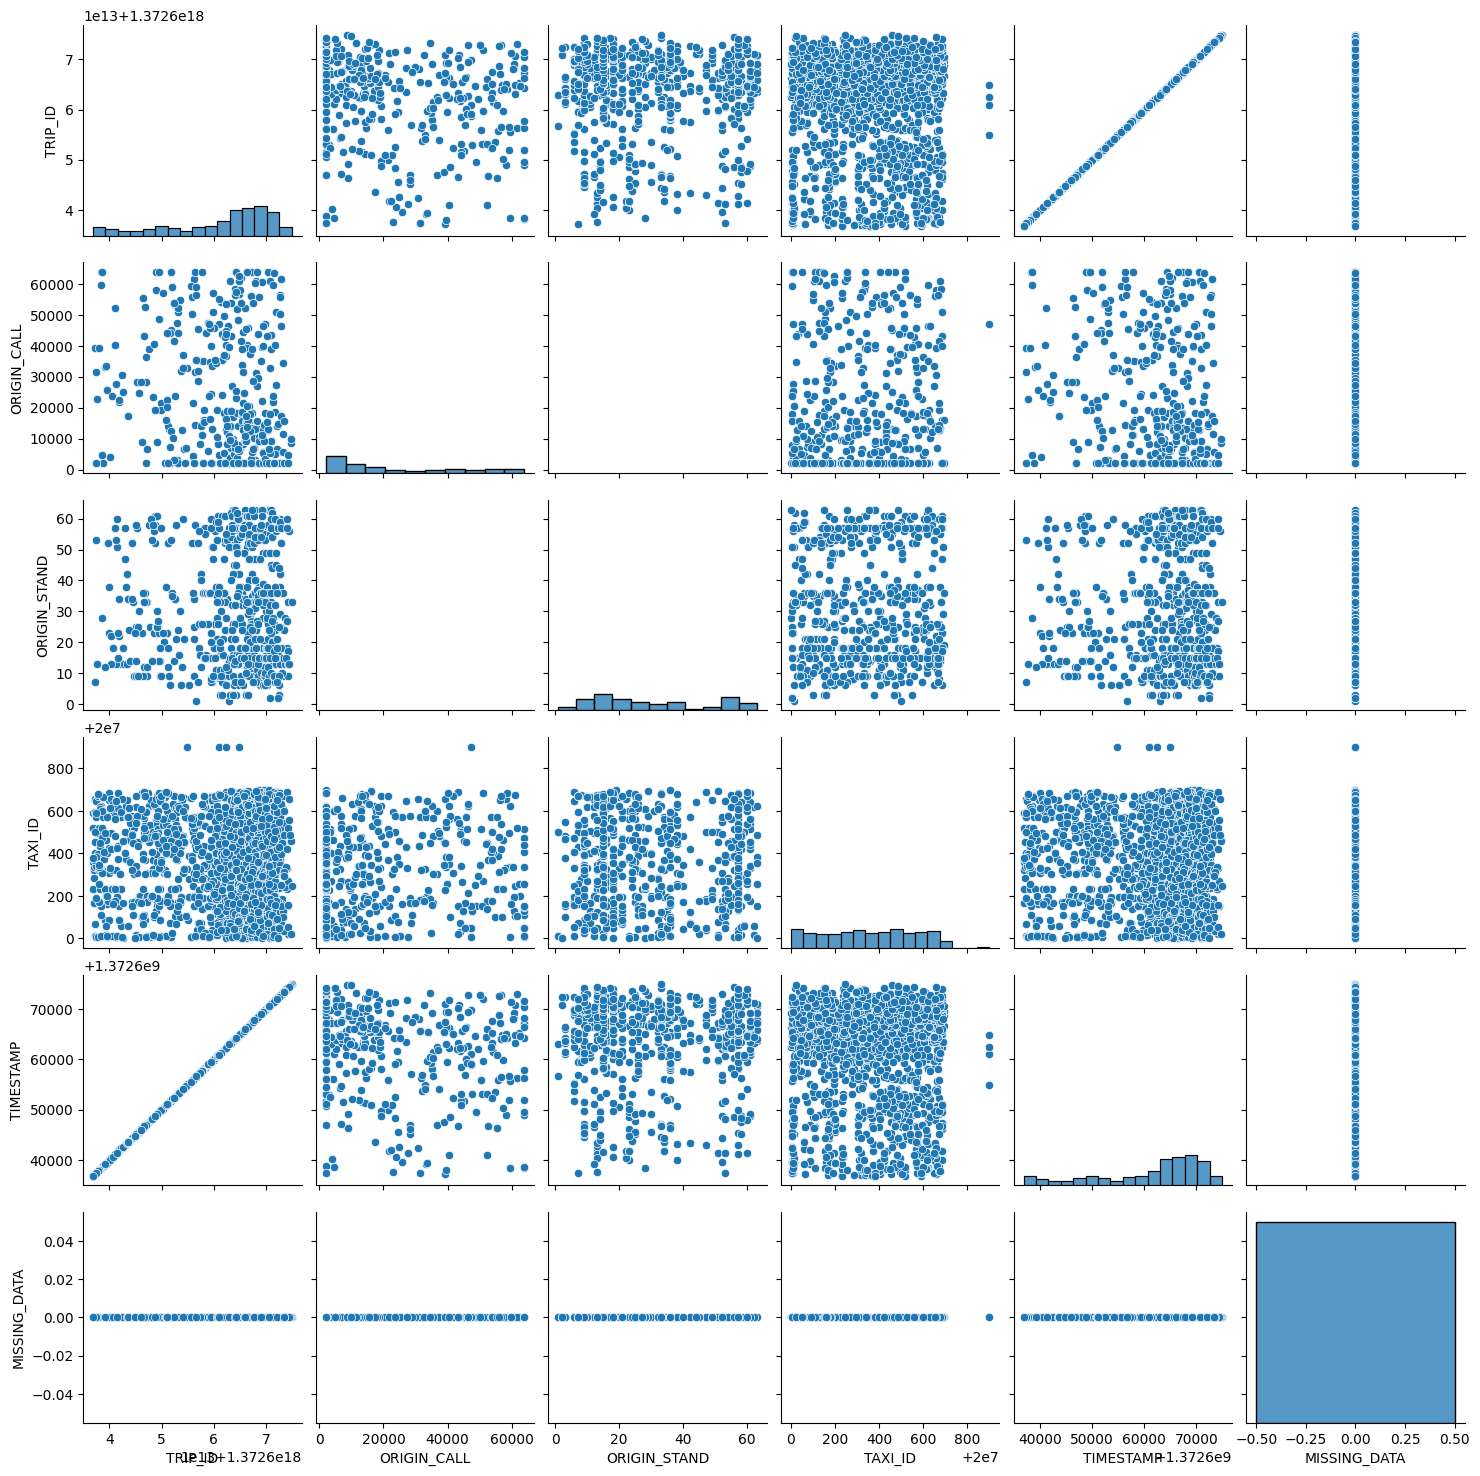

Visualizing Categorical Data:


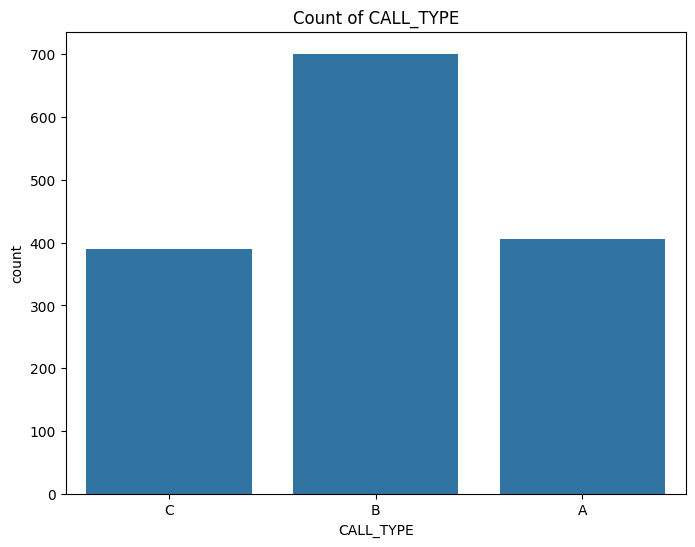

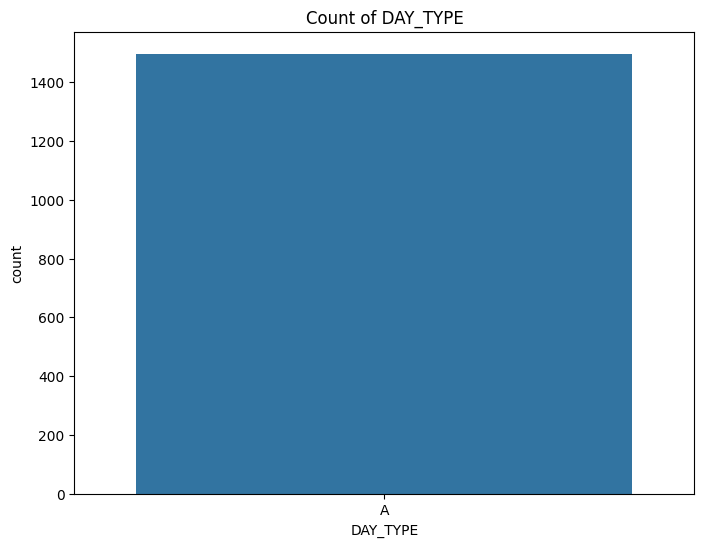

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. General Information about the dataset
print("Dataset Info:")
print(train_1497.info())
print("\n")

# 2. Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(train_1497.describe())
print("\n")

# 3. Count of unique values per column
print("Count of Unique Values in Each Column:")
print(train_1497.nunique())
print("\n")

# 4. Missing Values Check
print("Missing Values:")
print(train_1497.isnull().sum())
print("\n")

# 5. Distribution of Categorical Columns
print("Distribution of Categorical Columns:")
for col in train_1497.select_dtypes(include=['object']).columns:
    print(f"\n{col} distribution:")
    print(train_1497[col].value_counts())
    print("\n")

# 6. Visualize Distribution of Numerical Columns
print("Visualizing Distribution of Numerical Columns:")
for col in train_1497.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_1497[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# 7. Correlation Heatmap (only for numerical columns)
print("Correlation Heatmap of Numerical Columns:")

# Select only numeric columns for correlation
numeric_columns = train_1497.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

# 8. Visualizing Pairwise Relationships (if applicable)
# This step is for small datasets with numerical columns, use with caution for larger datasets
print("Pairwise Relationships (Pairplot):")
sns.pairplot(train_1497)
plt.show()

# 9. Visualizing Categorical Data (if applicable)
# Use bar plots to visualize the distribution of categorical features
print("Visualizing Categorical Data:")
for col in train_1497.select_dtypes(include=['object']).columns:
    # Skip the 'POLYLINE' column
    if col == 'POLYLINE':
        continue
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_1497, x=col)
    plt.title(f'Count of {col}')
    plt.show()

                  TRIP_ID  polyline_length
721   1372663871620000085     67947.981606
505   1372654295620000455     57864.101919
86    1372637754620000007     47944.181587
376   1372656241620000539     47015.117651
819   1372666327620000120     43524.810131
...                   ...              ...
188   1372650711620000403        16.692270
195   1372650908620000403         3.064651
1265  1372672726620000602         1.252908
562   1372656508620000458         1.252736
1345  1372673753620000495         0.999527

[1481 rows x 2 columns]


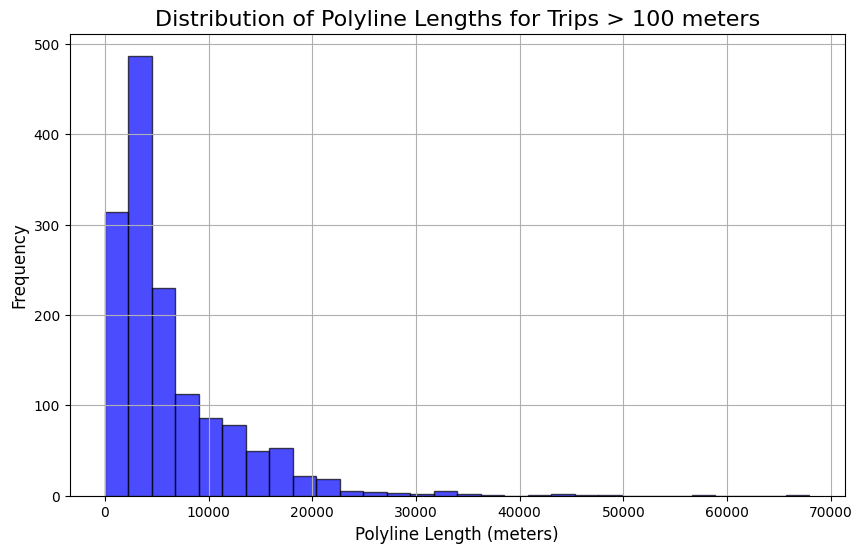

In [ ]:
import ast
from geopy.distance import geodesic
import matplotlib.pyplot as plt

# Function to calculate polyline length
def calculate_polyline_length(data):
    # Create a copy of the data to avoid modifying the original DataFrame
    data = data.copy()

    polyline_length = []
    for index, row in data.iterrows():
        polyline = row['POLYLINE']
        length = 0
        if isinstance(polyline, str):
            coordinates = ast.literal_eval(polyline)
            for i in range(1, len(coordinates)):
                point1 = (coordinates[i-1][1], coordinates[i-1][0])  # (lat, lon)
                point2 = (coordinates[i][1], coordinates[i][0])
                length += geodesic(point1, point2).meters
        polyline_length.append(length)

    # Use .loc to avoid SettingWithCopyWarning
    data.loc[:, 'polyline_length'] = polyline_length
    return data

# Example usage for the train_1500 dataset
train_1497_data = calculate_polyline_length(train_1497)

# Filter for trips with polyline length greater than 0 and sort by polyline length in descending order
long_trips = train_1497_data[train_1497_data['polyline_length'] > 0].sort_values(by='polyline_length', ascending=False)

# Display the trip IDs with polyline length > 100 meters
print(long_trips[['TRIP_ID', 'polyline_length']])

# Plot the distribution of polyline lengths for trips > 100 meters
plt.figure(figsize=(10, 6))
plt.hist(long_trips['polyline_length'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Polyline Lengths for Trips > 100 meters', fontsize=16)
plt.xlabel('Polyline Length (meters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()
